# Rigid Body Dynamics -- Orientation Control
---
Here we show how to plot a surface in 3D (e.g., a mesh ellipsoid) and control its orientation via a rotation operator.

In [30]:
# set graphics backend
%matplotlib notebook
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Plot mesh ellipsoid

In [31]:
# mesh ellipsoid
ngrid = 20
theta = np.linspace(0, np.pi,ngrid)
phi = np.linspace(0, 2*np.pi, ngrid)
THETA, PHI = np.meshgrid(theta, phi)
a = 2.0
b = 1.5
c = 1.0
X = a*np.sin(THETA)*np.cos(PHI)
Y = b*np.sin(THETA)*np.sin(PHI)
Z = c*np.cos(THETA)
# rotation axis
d = 1.5*c
rotx = np.array([[0, 0], [0, 0], [-d, d]])

<IPython.core.display.Javascript object>


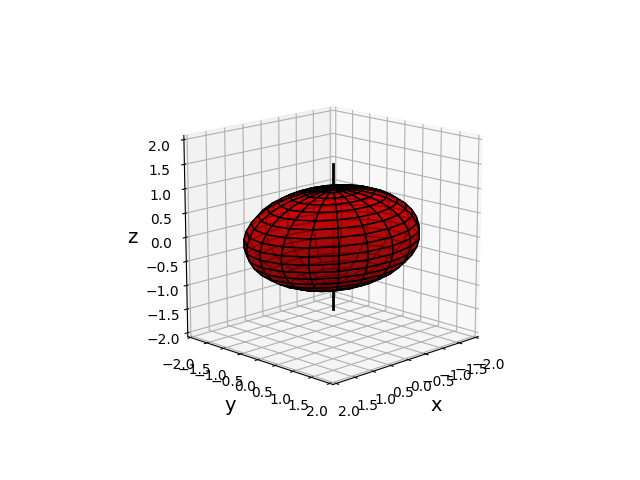

In [32]:
# plot
xmax = ymax = zmax = max([a, b, c])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect='equal')
ax.view_init(elev=15.0, azim=45.0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='r', edgecolor='k', alpha=0.8, linewidth=1)
ax.plot(rotx[0, :], rotx[1, :], rotx[2, :], color = 'k', linewidth=2)
ax.set_xlim3d(-xmax, xmax)
ax.set_ylim3d(-ymax, ymax)
ax.set_zlim3d(-zmax, zmax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
plt.show()

## 2. Orientation via Euler angles

In [33]:
# rotation matrix
def rotation(eul_phi, eul_theta, eul_psi):
    c1 = np.cos(eul_phi);   s1 = np.sin(eul_phi)
    c2 = np.cos(eul_theta); s2 = np.sin(eul_theta)
    c3 = np.cos(eul_psi);   s3 = np.sin(eul_psi)
    #NOTE: signs are adapted for active transformations
    Rz1 = np.matrix([[c1, -s1, 0], [s1, c1, 0], [0, 0, 1]])
    Rx2 = np.matrix([[1, 0, 0], [0, c2, -s2], [0, s2, c2]])
    Rz3 = np.matrix([[c3, -s3, 0], [s3, c3, 0], [0, 0, 1]])
    return Rz1*Rx2*Rz3

In [47]:
# choose Euler angles (in radians)
phi   = 0
theta = np.pi/6
psi   = 0.5*np.pi/3
# calculate rotation matrix
R = rotation(phi, theta, psi)
# calculate new ellipsoid
XNEW = R[0,0]*X + R[0,1]*Y + R[0,2]*Z
YNEW = R[1,0]*X + R[1,1]*Y + R[1,2]*Z
ZNEW = R[2,0]*X + R[2,1]*Y + R[2,2]*Z
# calculate new rotation axis
rotxNEW = np.array(np.dot(R, rotx))

<IPython.core.display.Javascript object>


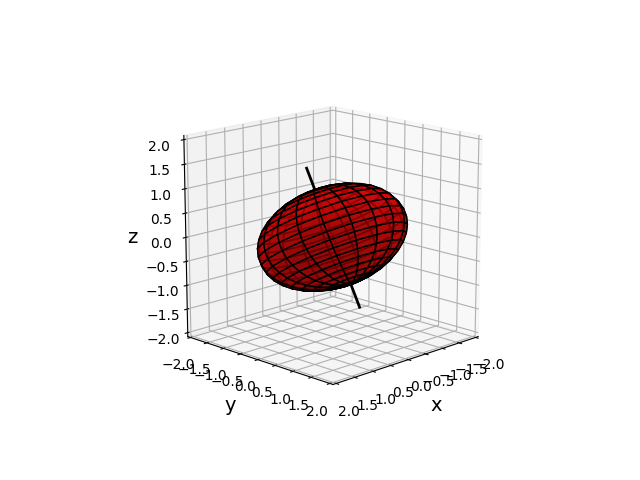

In [48]:
# plot
xmax = ymax = zmax = max([a, b, c])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect='equal')
ax.view_init(elev=15.0, azim=45.0)
ax.plot_surface(XNEW, YNEW, ZNEW, rstride=1, cstride=1, color='r', edgecolor='k', alpha=0.8, linewidth=1)
ax.plot(rotxNEW[0, :], rotxNEW[1, :], rotxNEW[2, :], color = 'k', linewidth=2)
ax.set_xlim3d(-xmax, xmax)
ax.set_ylim3d(-ymax, ymax)
ax.set_zlim3d(-zmax, zmax)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
plt.show()

## 3. Orientation via quaternions